## Does increasing advertisment in TV, Newspaper & Radio increases sales

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# so we can see reading was success

In [6]:
# removing sales to get all features in one place 

In [7]:
X = df.drop('sales',axis=1)

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']

In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
# separated sales from feature

In [12]:
# Now train and test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#help(train_test_split)

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
 #test_size = 0.3 or 30% what amount of data should be send for testing
 #random_state = 42 means it shuffles the array

In [16]:
len(df)

200

In [17]:
len(X_train)

140

In [18]:
len(X_test)

60

In [19]:
#so as we can see it takes 30% from the data set for test 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#help(LinearRegression)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
test_result  = model.predict(X_test)

In [25]:
test_result

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
#mean of sales from the data set

In [28]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

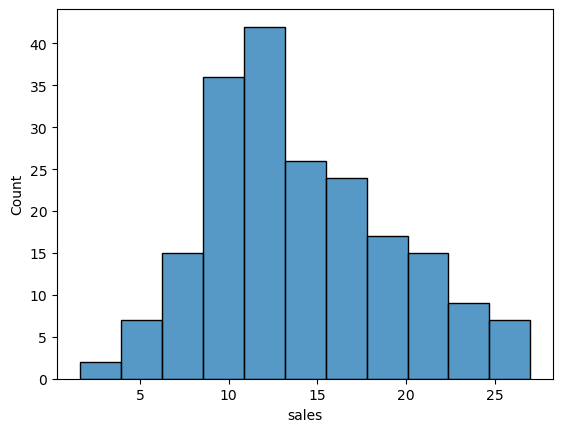

In [29]:
sns.histplot(data= df , x ='sales')

<Axes: xlabel='sales', ylabel='Count'>

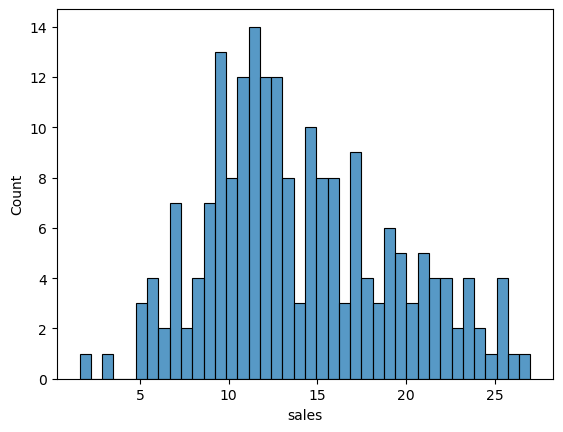

In [30]:
sns.histplot(data= df , x ='sales' , bins = 40)

In [31]:
mean_absolute_error(y_test , test_result) #mae

1.2137457736144805

In [32]:
mean_squared_error(y_test , test_result) #mse

2.298716697886378

In [33]:
np.sqrt(mean_squared_error(y_test , test_result)) #rmse

1.5161519375993877

In [34]:
test_residual = y_test - test_result

<Axes: xlabel='sales', ylabel='sales'>

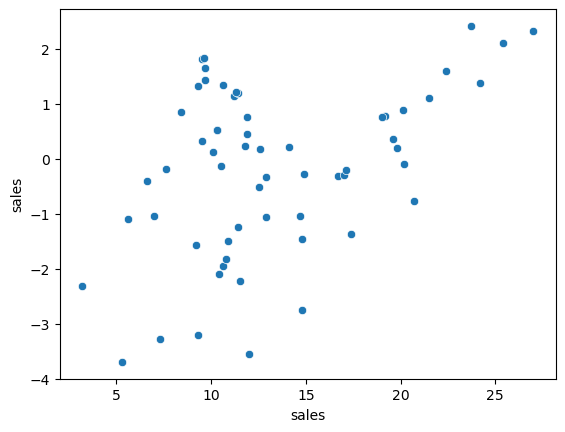

In [35]:
sns.scatterplot(x=y_test , y = test_residual)

In [36]:
import scipy as sp

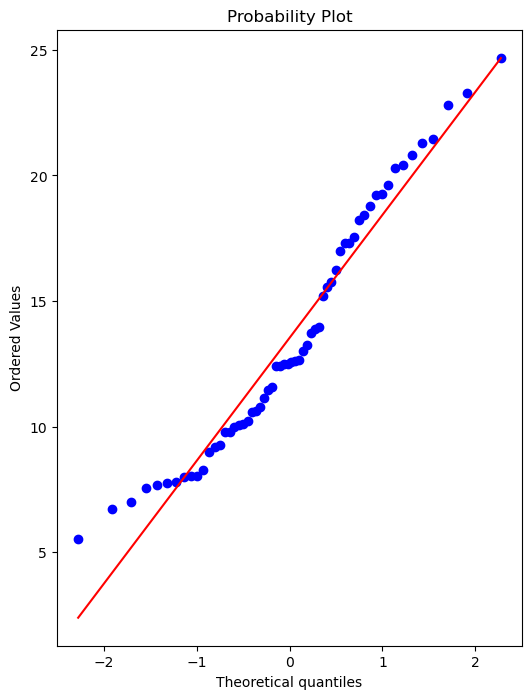

In [37]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_result,plot=ax)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X,y)

LinearRegression()

In [42]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [44]:
y_hat = final_model.predict(X)

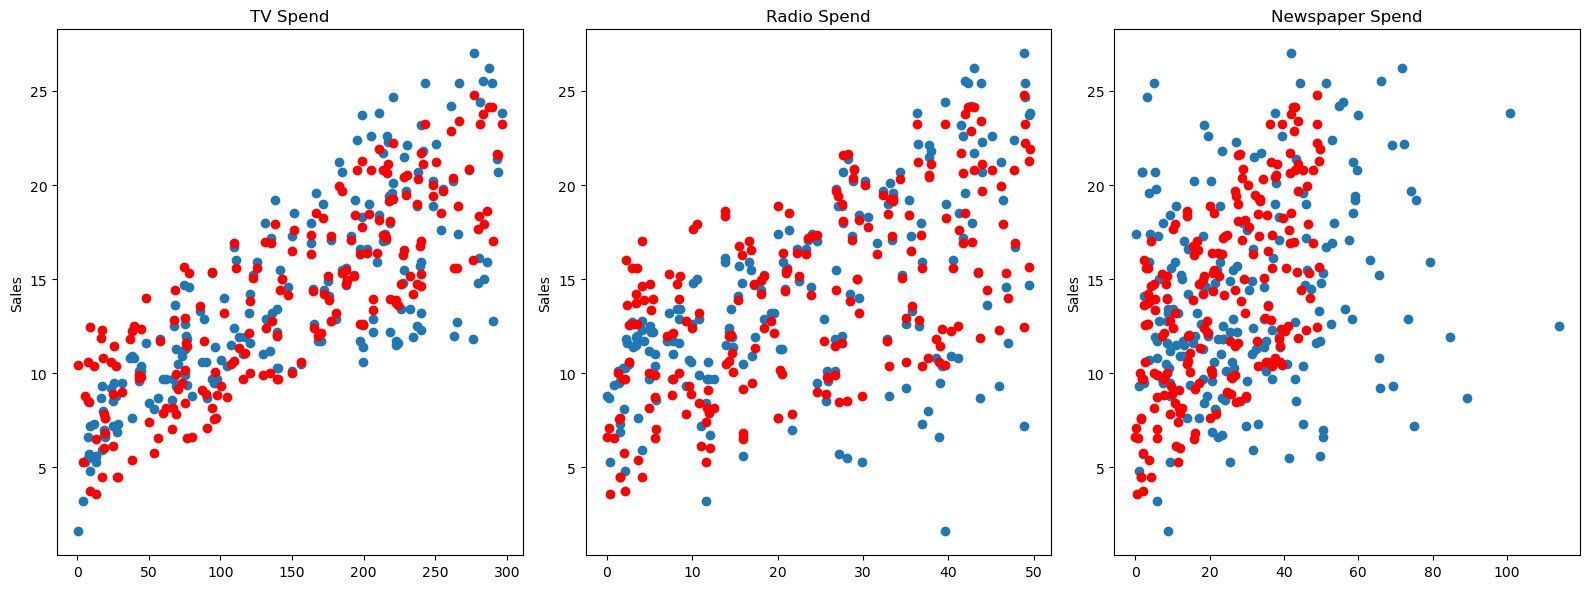

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [48]:
from joblib import load,dump

In [ ]:
# to store the model 

In [50]:
dump(final_model , 'Sales ka Data.joblib')

['Sales ka Data.joblib']

In [ ]:
# to upload the model into a new system

In [51]:
load_model = load("Sales ka Data")

# Sales Campaign

### TV = 149 , Radio = 22 , Newspaper = 50

In [54]:
units = [[149,22,50]]
out = load_model.predict(units)

C:\Users\niket\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
